# What is SMS spam?

SMS spam is any unwanted or unsolicited text message sent indiscriminately to your mobile phone, often for commercial purposes. It can take the form of a simple message, a link to a number to call or text, a link to a website for more information or a link to a website to download an application.

![](https://static.techspot.com/images2/news/thumbs/2013/07/2012-11-28-teaserd0b.jpg)

We have often received similar messages in our phones- and this really makes us irriated. 
But what if we had a way to identify if a message is spam as soon as we saw it?
What if we can smoothly ignore the messgaes- and read only the one ones that are meaningful.

This is our target right now:

We start with this mini project of ours:
# SMS Spam Classifier

![](https://miro.medium.com/max/1153/1*BZ0JACBXzTv4t-bdBy3o8A.png)

So as you have seen in the pic- we hsall be checking out two algorithms, and identify which one would be the best apporach to solve the problems- 

### Then lets take a cup of coffee, and start coding...

![](https://www.tech-mugs.com/wp-content/uploads/2020/06/33719-9.jpg)


# Importing the libraries

We are importing the libraries as and when required. While we read through this, we will look into a brief understanding of each library and its scope.

**NumPy** is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays

**Pandas** is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software released under the three-clause BSD license


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**NLTK** is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

You can read on the NLTK documentation by clicking this link: https://www.nltk.org/

In [ ]:
import nltk
import re
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

# Reading the dataset

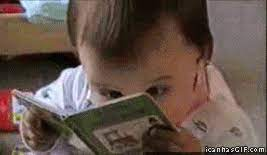

In [ ]:
data=pd.read_csv('/kaggle/input/spam-text-message-classification/SPAM text message 20170820 - Data.csv')
data.head()

Observations: What we see here is we have two columns of data-

**Message-** The text message which is to be categorized

**Category-** The classification whether the text message is a spam or not spam (Lol, Ham!)

But for a Machine Learning algorithm, it will not be easy to demarcate the statements as Spam or Ham- instead- our target would be to assign if the message is a spam or not.
So let us apply a preprocessing- via which the two categories are marked by 0 and 1- which will in turn help the algorithm to best identify the inputs

We will be using the preprocessing technique of LabelEncoder for the same
You can read on Label Encoder using the follwoing link: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Category']=le.fit_transform(data['Category'])
data.head()

# Cleaning the message

The texts we recieve have multiple factors that are unwanted and unhelpful. providing that data to the machine learning algorthim will make it just suffer. Instead lets take on some approach to clean up the text as much as possible. 

So what methods should we adopt to clean out our message?

1. Firstly, we need to take a look into the text message to find if there are any unwanted url links. This information is generally not useful- so we shall be removing them i the first step\
2. Symbols- For a text classifier- we genrally tend to remove all the punctuatuions, as they are of no use in a text predictor
3. Lets remove all other characters than alphabets-numbers wont be a crucial input to the algorithm.
4. Finally, we will need to lemmatize the words. Now as expected- you would want to know the meaning of lemmatize.

# Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

Text preprocessing includes both Stemming as well as Lemmatization. Many times people find these two terms confusing. Some treat these two as same. Actually, lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

Applications of lemmatization are:

* Used in comprehensive retrieval systems like search engines.
* Used in compact indexing

![](https://cdn-images-1.medium.com/max/1024/1*ES5bt7IoInIq2YioQp2zcQ.png)

So now, let us clean up our text message!

In [ ]:
wordnet=WordNetLemmatizer()
corpus=[]
for i in range(0,len(data)):
    review = re.sub(r'https?://\S+|www.\S+', '', data["Message"][i])
    review = re.sub(r'<.*?>', '', review)
    review = re.sub(r'[^a-zA-Z]+', ' ', review)
    review = re.sub(r'[0-9]', '', review)
    review=review.lower()
    review=review.split()
    review=[str(wordnet.lemmatize(word)) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)
    

Separating the dependent and independent variables:
1. X-> **Independent Variables**- The Basis in which the outputs have to be calculated
2. X->**Dependent Variable**-The output being calculated from the inputs

Generally, X and y are the standard norms that we use in order to depict the Independent and Dependent variables repectively. However, it is completely the coder choice as to which will be the option you wish to choose.

![](https://www.wikihow.com/images/thumb/7/71/Identify-Dependent-and-Independent-Variables-Step-2.jpg/v4-460px-Identify-Dependent-and-Independent-Variables-Step-2.jpg.webp)

In [ ]:
y=data["Category"]
X=pd.DataFrame(corpus,columns=['text'])

Now we shall be distributing our data into two parts-
1. **Train Set**- The Train Set is the data that the model is trained with (or in other words, the data from which the model learns)
2. **Test Set**- The Test Set is the data which the model has to see, and predict the output.

This is kind of similar to studying:
1. We read some texts, from where we understand the concepts and know about the topics (Training)
2. Then, we appear for the exam where we apply our knowledge and are able to Test our understanding.

The sklearn library of python provides an amazing option- **Train_test_split**

You can reacd more about the module using this link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

### Now how do we process the statements?

Whenever we have textual data, we need to apply several pre-processing steps to the data to transform words into numerical features that work with machine learning algorithms. The pre-processing steps for a problem depend mainly on the domain and the problem itself, hence, we don’t need to apply all steps to every problem.

In this article, we are going to see text preprocessing in Python. We will be using the Count Vectorizer module here.

You can read more about it using the link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
train_X=cv.fit_transform(X_train['text']).toarray()
test_X=cv.transform(X_test['text']).toarray()

Lets Take a look at the output of the CountVectorizer- 
And the dimensions of each table-

In [ ]:
train_X

Observation: It just forms an array of 0s and 1s. You shall be able to get the entire understanding of the array on readin gthe documentation mentioned above

In [ ]:
print(train_X.shape)
print(test_X.shape)
print(y_train.shape)
print(y_test.shape)

### Importing Naive Bayes Algorithm

![](https://miro.medium.com/max/1200/1*ZW1icngckaSkivS0hXduIQ.jpeg)

Check out the documentation on Naive Bayes Classifier from this link: https://scikit-learn.org/stable/modules/naive_bayes.html

In the next step, we shall be incorporating the Naive Bayes Classifier and training it on the Train Data. Once trained, it will be used to predict the outputs from the test data set

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB().fit(train_X,y_train)
y_pred_nb=nb.predict(test_X)

Now we shall be introducing a new concept- **Confusion Matrix**

"A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing"

Read more on the documentation by clicking on the link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

We shall generate the report, and for visualizing it, we will be using the heatmap feature of the seaborn library. Let's take a look:-

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_nb)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')

**Observations:**

Its now time that we analyze the results:-
1. 948 Non-Spam mails have been correctly classified
2. 149 Spam mails have been correctly classified
3. 7 Non-Spam mails have been classified as Spam mails (False Positives or Type I Error)
4. 11 Spam mails have been classified as Non-Spam (False Negatives or Type II Error)

Now before deep-diving, we shall take a look into the next model!

### Importing the Random Forest Classifier

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/rfc_vs_dt1.png)

You shall be able to read about this in more details in the documentation. Kindly find the link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

So, like Naive Bayes algorithm, we shall be applying the same procedure in here as well. Lets first train the model, and then check its output using a confusion matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0).fit(train_X,y_train)
y_pred_rfc=rfc.predict(test_X)
cm=confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')

**Observations:**

Using the Random Forest Classifier:
1. 955 Non-Spam mails have been correctly classified
2. 141 Spam mails have been correctly classified
3. 0 Non-Spam mails have been classified as Spam mails (False Positives or Type I Error)
4. 19 Spam mails have been classified as Non-Spam (False Negatives or Type II Error)

So as we have both the set of results- now it would be a crucial step to understand

# Understanding the Results

Now since, we have checked the outputs from the two algorithms- the main question that arises is- **which model is better?**

The best approach in order to undertsand and estimate this is by evaluating the mtrics. Usually the metrics to evaluate the performance of a Classification Problem are- **Precision** and **Recall**

So what is Precision and Recall?

![](https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm)

Wikipedia actually gives a pretty good understanding on the concepts of Precision and Recall. You can check it from the link here: https://en.wikipedia.org/wiki/Precision_and_recall

Now instead of calculating it mannually, lets do it using modules of the sklearn.metrics library. For reading, refer to:
1. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

Let's implement these and check the results

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('******** Naive Bayes Classifier **********')
print('Precision Score: ',precision_score(y_test,y_pred_nb))
print('Recall Score: ',recall_score(y_test,y_pred_nb))
print('****************************************')
print('******** Random Forest Classifier **********')
print('Precision Score: ',precision_score(y_test,y_pred_rfc))
print('Recall Score: ',recall_score(y_test,y_pred_rfc))

**Interesting!**

We see:
1. Precision of Random Forest Classifier > Precision of Naive Bayes Classifier
2. Recall of Naive Bayes Classifier > Recall of Random Forest Classifier

Now that is a confusion!

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRphl-UcxSTfsc9Xk9SBY98_xHjNMXEBJ9Atw&usqp=CAU)

Now comes the inputs of a Data Scientist:

Imagine you have implemented this system in your device, you can have 2 situations:

1. Most of your Spam mails are being stopped, but some of your important mails (which are ideally Non-Spam) are also getting stopped- since they are being tagged as Spam
2. The bar is set slightly low- only confirmed Spam mails are being blocked, but its ensured that other mails (Non-Spam) are not getting blocked

What will be your choice?

![](https://cdn3.iconfinder.com/data/icons/artificial-intelligence-2-3/48/101-512.png)

In most cases, a user would want the first choice- in order to ensure that a minimal (or better if absoltely none) important mails are tagged in as **spam**- and rejected. Going by that understanding... We must target that we have least numbers of False Positives.

Or indirectly, **Precision would be the Key metrics**

So by that logic- **Random Forest Classifier would be the model we choose to solve this problem**



# Conclusion

We have learned a number of concepts in this Notebook:

1. How to process and clean text data. Since it will not be understood by the computers, how can we modify the data we have into computer suppported format
2. How do we implement a Machine Learning model, and measure the performance of the model
3. If we have inputs from two or more models, on what grounds should we choose the best model

## Please upvote if you liked the guidance! 
There will be many more to follow this!

![](https://i.pinimg.com/originals/0f/ab/3e/0fab3e4f7e9e7d3f199c49f10308ac05.gif)